In [1]:
train_dir=r"C:\Users\sidre\Desktop\cats_and_dogs_small\train"
valid_dir=r"C:\Users\sidre\Desktop\cats_and_dogs_small\validation"
test_dir=r"C:\Users\sidre\Desktop\cats_and_dogs_small\test"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
### We have different images with different specifics: portrait,landscape,different dimensions
## ImageDateGenerator will reshape all of them and bring them to same dimension 

In [12]:
### Generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) ## 32 filters with 3x3 window with 3 channels
model.add(layers.MaxPooling2D((2,2))) ## 2x2 max pooling layer

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [14]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=["accuracy"])


In [17]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,
                            validation_data=validation_generator,validation_steps=50) 
# since we have 2000 we need to see that steps_per_epoch*epochs=2000

Epoch 1/20
100/100 [==============================] - 112s 1s/step - loss: 0.6262 - accuracy: 0.6615 - val_loss: 0.6278 - val_accuracy: 0.6360
Epoch 2/20
100/100 [==============================] - 113s 1s/step - loss: 0.5841 - accuracy: 0.6885 - val_loss: 0.6072 - val_accuracy: 0.6670
Epoch 3/20
100/100 [==============================] - 100s 1s/step - loss: 0.5527 - accuracy: 0.7170 - val_loss: 0.5841 - val_accuracy: 0.6910
Epoch 4/20
100/100 [==============================] - 99s 986ms/step - loss: 0.5152 - accuracy: 0.7450 - val_loss: 0.5794 - val_accuracy: 0.6920
Epoch 5/20
100/100 [==============================] - 97s 973ms/step - loss: 0.4932 - accuracy: 0.7610 - val_loss: 0.5616 - val_accuracy: 0.7210
Epoch 6/20
100/100 [==============================] - 98s 980ms/step - loss: 0.4699 - accuracy: 0.7670 - val_loss: 0.5707 - val_accuracy: 0.6930
Epoch 7/20
100/100 [==============================] - 100s 997ms/step - loss: 0.4471 - accuracy: 0.7945 - val_loss: 0.5652 - val_accurac

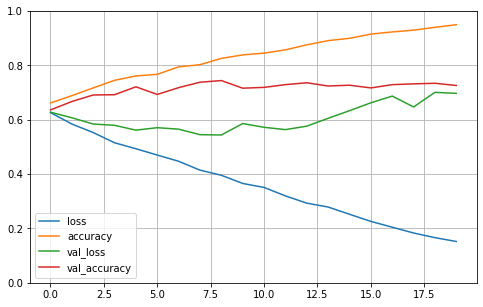

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
model.save("cat_dog_classifier.h5")

In [7]:
from tensorflow import keras

In [8]:
model=keras.models.load_model("cat_dog_classifier.h5")

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      